<a href="https://colab.research.google.com/github/SaiTejaBorgam/Data-Science-Project/blob/main/Project%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pd.set_option('mode.chained_assignment', None)

In [2]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Bitcoin = pd.read_csv("/content/drive/MyDrive/Bitcoin_Price.csv")
print(f"Dataset loaded with {len(Bitcoin)} rows and {len(Bitcoin.columns)} columns.")

Dataset loaded with 4309 rows and 4 columns.


In [6]:
Bitcoin.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [7]:
Bitcoin.tail()

,snapped_at,price,market_cap,total_volume
4304,2025-02-10 00:00:00 UTC,96548.578654,1.913069e+12,2.545711e+10
4305,2025-02-11 00:00:00 UTC,97399.981614,1.930743e+12,3.705499e+10
4306,2025-02-12 00:00:00 UTC,95739.977371,1.898789e+12,3.645458e+10
4307,2025-02-13 00:00:00 UTC,97836.188561,1.936842e+12,4.711562e+10
4308,2025-02-14 00:00:00 UTC,96561.663999,1.914315e+12,2.908437e+10


In [7]:
Bitcoin.isnull().sum()

,0
snapped_at,0
price,0
market_cap,1
total_volume,0


In [8]:
Bitcoin.describe()

,price,market_cap,total_volume
count,4309.000000,4.308000e+03,4.309000e+03
mean,18158.924482,3.462074e+11,1.662990e+10
std,23100.015393,4.522585e+11,2.058948e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,619.908800,9.033778e+09,3.699869e+08
50%,7977.244882,1.396865e+11,7.496626e+09
75%,28988.320996,5.558950e+11,2.696615e+10
max,106182.236820,2.100630e+12,1.904603e+11


In [8]:
Bitcoin.fillna(method='ffill', inplace=True)

<ipython-input-8-761d41973190>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Bitcoin.fillna(method='ffill', inplace=True)


In [9]:
Bitcoin.isnull().sum()

,0
snapped_at,0
price,0
market_cap,0
total_volume,0


In [10]:
Bitcoin['snapped_at'] = pd.to_datetime(Bitcoin['snapped_at'])

In [11]:
Bitcoin.dtypes

,0
snapped_at,"datetime64[ns, UTC]"
price,float64
market_cap,float64
total_volume,float64


In [12]:
Bitcoin.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


In [13]:
Bitcoin.tail()

,snapped_at,price,market_cap,total_volume
4304,2025-02-10 00:00:00+00:00,96548.578654,1.913069e+12,2.545711e+10
4305,2025-02-11 00:00:00+00:00,97399.981614,1.930743e+12,3.705499e+10
4306,2025-02-12 00:00:00+00:00,95739.977371,1.898789e+12,3.645458e+10
4307,2025-02-13 00:00:00+00:00,97836.188561,1.936842e+12,4.711562e+10
4308,2025-02-14 00:00:00+00:00,96561.663999,1.914315e+12,2.908437e+10


In [14]:
import matplotlib.pyplot as plt

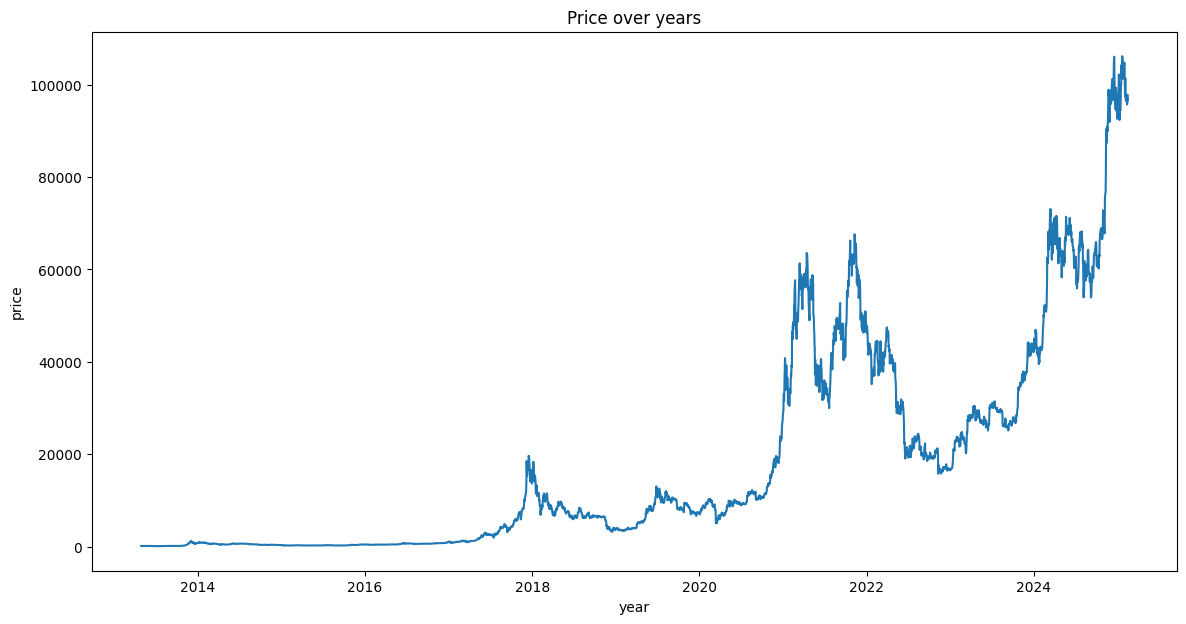

In [15]:
plt.figure(figsize=(14,7))
plt.plot(Bitcoin['snapped_at'], Bitcoin['price'])
plt.title("Price over years")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

In [16]:
Ethereum = pd.read_csv("/content/drive/MyDrive/Ethereum_Price.csv")
print(f"Dataset loaded with {len(Ethereum)} rows and {len(Ethereum.columns)} columns.")

Dataset loaded with 3479 rows and 4 columns.


In [17]:
Ethereum.head()

,snapped_at,price,market_cap,total_volume
0,2015-08-07 00:00:00 UTC,2.831620,0.000000e+00,9.062200e+04
1,2015-08-08 00:00:00 UTC,1.330750,8.033948e+07,3.680700e+05
2,2015-08-10 00:00:00 UTC,0.687586,4.155631e+07,4.004641e+05
3,2015-08-11 00:00:00 UTC,1.067379,6.453901e+07,1.518998e+06
4,2015-08-12 00:00:00 UTC,1.256613,7.601326e+07,2.073893e+06


In [18]:
Ethereum.tail()

,snapped_at,price,market_cap,total_volume
3474,2025-02-10 00:00:00 UTC,2632.535822,3.173697e+11,1.715554e+10
3475,2025-02-11 00:00:00 UTC,2660.296800,3.207115e+11,1.884342e+10
3476,2025-02-12 00:00:00 UTC,2603.033370,3.139432e+11,2.121291e+10
3477,2025-02-13 00:00:00 UTC,2736.270314,3.294925e+11,2.650366e+10
3478,2025-02-14 00:00:00 UTC,2675.709001,3.225841e+11,1.893819e+10


In [19]:
Ethereum.describe()

,price,market_cap,total_volume
count,3479.000000,3.478000e+03,3.479000e+03
mean,1176.032677,1.382992e+11,1.078938e+10
std,1245.440600,1.498023e+11,1.281599e+10
min,0.432979,0.000000e+00,8.707480e+04
25%,156.648274,1.653049e+10,9.597204e+08
50%,472.977265,4.879259e+10,7.873172e+09
75%,1976.364164,2.357122e+11,1.553064e+10
max,4815.004634,5.716658e+11,1.409065e+11


In [20]:
Ethereum.isnull().sum()

,0
snapped_at,0
price,0
market_cap,1
total_volume,0


In [21]:
Ethereum.fillna(method='ffill', inplace=True)

<ipython-input-21-461e767dce9d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Ethereum.fillna(method='ffill', inplace=True)


In [22]:
Ethereum.isnull().sum()

,0
snapped_at,0
price,0
market_cap,0
total_volume,0


In [23]:
Ethereum['snapped_at'] = pd.to_datetime(Ethereum['snapped_at'])

In [24]:
Ethereum.dtypes

,0
snapped_at,"datetime64[ns, UTC]"
price,float64
market_cap,float64
total_volume,float64


In [25]:
Q1 = Bitcoin["price"].quantile(0.25)
Q3 = Bitcoin["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Bitcoin[(Bitcoin["price"] < lower_bound) | (Bitcoin["price"] > upper_bound)]
print("Outliers detected:")
print(outliers)

Bitcoin_afterclean = Bitcoin[(Bitcoin["price"] >= lower_bound) & (Bitcoin["price"] <= upper_bound)]
print("Cleaned Data:")
print(Bitcoin_afterclean)

Outliers detected:
                    snapped_at         price    market_cap  total_volume
3969 2024-03-12 00:00:00+00:00  72130.553008  1.417773e+12  6.665307e+10
3971 2024-03-14 00:00:00+00:00  73097.767027  1.436631e+12  5.190660e+10
3997 2024-04-09 00:00:00+00:00  71624.184862  1.410325e+12  3.311195e+10
4201 2024-10-30 00:00:00+00:00  72781.113082  1.439310e+12  6.548778e+10
4202 2024-10-31 00:00:00+00:00  72342.621711  1.431086e+12  4.349814e+10
...                        ...           ...           ...           ...
4304 2025-02-10 00:00:00+00:00  96548.578654  1.913069e+12  2.545711e+10
4305 2025-02-11 00:00:00+00:00  97399.981614  1.930743e+12  3.705499e+10
4306 2025-02-12 00:00:00+00:00  95739.977371  1.898789e+12  3.645458e+10
4307 2025-02-13 00:00:00+00:00  97836.188561  1.936842e+12  4.711562e+10
4308 2025-02-14 00:00:00+00:00  96561.663999  1.914315e+12  2.908437e+10

[105 rows x 4 columns]
Cleaned Data:
                    snapped_at         price    market_cap  total_v

In [26]:
#sma- simple moving averages
Bitcoin_afterclean["SMA_50"] = Bitcoin_afterclean["price"].rolling(window=50).mean()
Bitcoin_afterclean["SMA_200"] = Bitcoin_afterclean["price"].rolling(window=200).mean()

In [27]:
#ema- exponential moving averages
Bitcoin_afterclean["EMA_20"] = Bitcoin_afterclean["price"].ewm(span=20, adjust=False).mean()
Bitcoin_afterclean["EMA_50"] = Bitcoin_afterclean["price"].ewm(span=50, adjust=False).mean()

In [28]:
#bollinger bands
Bitcoin_afterclean["Rolling_STD"] = Bitcoin_afterclean["price"].rolling(window=50).std()
Bitcoin_afterclean["BB_Upper"] = Bitcoin_afterclean["SMA_50"] + (2 * Bitcoin_afterclean["Rolling_STD"])
Bitcoin_afterclean["BB_Lower"] = Bitcoin_afterclean["SMA_50"] - (2 * Bitcoin_afterclean["Rolling_STD"])

In [29]:
Q1 = Ethereum["price"].quantile(0.25)
Q3 = Ethereum["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Ethereum[(Ethereum["price"] < lower_bound) | (Ethereum["price"] > upper_bound)]
print("Outliers detected:")
print(outliers)

Ethereum_afterclean = Ethereum[(Ethereum["price"] >= lower_bound) & (Ethereum["price"] <= upper_bound)]
print("Cleaned Data:")
print(Ethereum_afterclean)

Outliers detected:
                    snapped_at        price    market_cap  total_volume
2285 2021-11-09 00:00:00+00:00  4815.004634  5.716658e+11  2.122635e+10
2286 2021-11-10 00:00:00+00:00  4742.080911  5.609643e+11  2.066958e+10
2288 2021-11-12 00:00:00+00:00  4732.924450  5.602261e+11  1.904832e+10
Cleaned Data:
                    snapped_at        price    market_cap  total_volume
0    2015-08-07 00:00:00+00:00     2.831620  0.000000e+00  9.062200e+04
1    2015-08-08 00:00:00+00:00     1.330750  8.033948e+07  3.680700e+05
2    2015-08-10 00:00:00+00:00     0.687586  4.155631e+07  4.004641e+05
3    2015-08-11 00:00:00+00:00     1.067379  6.453901e+07  1.518998e+06
4    2015-08-12 00:00:00+00:00     1.256613  7.601326e+07  2.073893e+06
...                        ...          ...           ...           ...
3474 2025-02-10 00:00:00+00:00  2632.535822  3.173697e+11  1.715554e+10
3475 2025-02-11 00:00:00+00:00  2660.296800  3.207115e+11  1.884342e+10
3476 2025-02-12 00:00:00+00:00 

In [30]:
#sma- simple moving averages
Ethereum_afterclean["SMA_50"] = Ethereum_afterclean["price"].rolling(window=50).mean()
Ethereum_afterclean["SMA_200"] = Ethereum_afterclean["price"].rolling(window=200).mean()

In [31]:
#ema- exponential moving averages
Ethereum_afterclean["EMA_20"] = Ethereum_afterclean["price"].ewm(span=20, adjust=False).mean()
Ethereum_afterclean["EMA_50"] = Ethereum_afterclean["price"].ewm(span=50, adjust=False).mean()

In [32]:
#bollinger bands
Ethereum_afterclean["Rolling_STD"] = Ethereum_afterclean["price"].rolling(window=50).std()
Ethereum_afterclean["BB_Upper"] = Ethereum_afterclean["SMA_50"] + (2 * Ethereum_afterclean["Rolling_STD"])
Ethereum_afterclean["BB_Lower"] = Ethereum_afterclean["SMA_50"] - (2 * Ethereum_afterclean["Rolling_STD"])

In [33]:
#relative strength index
Bitcoin_afterclean["price_change"] = Bitcoin_afterclean["price"].diff()

Bitcoin_afterclean["gain"] = Bitcoin_afterclean["price_change"].where(Bitcoin_afterclean["price_change"] > 0, 0)
Bitcoin_afterclean["loss"] = -Bitcoin_afterclean["price_change"].where(Bitcoin_afterclean["price_change"] < 0, 0)
periods = 14
Bitcoin_afterclean["avg_of_gain"] = Bitcoin_afterclean["gain"].rolling(window=periods).mean()
Bitcoin_afterclean["avg_of_loss"] = Bitcoin_afterclean["loss"].rolling(window=periods).mean()

#relative strength
Bitcoin_afterclean["RS"] = Bitcoin_afterclean["avg_of_gain"] / Bitcoin_afterclean["avg_of_loss"]
#rsi
Bitcoin_afterclean["RSI"] = 100 - (100 / (1 + Bitcoin_afterclean["RS"]))

In [34]:
#macd
Bitcoin_afterclean["EMA_12"] = Bitcoin_afterclean["price"].ewm(span=12, adjust=False).mean()
Bitcoin_afterclean["EMA_26"] = Bitcoin_afterclean["price"].ewm(span=26, adjust=False).mean()

#macd line
Bitcoin_afterclean["MACD_Line"] = Bitcoin_afterclean["EMA_12"] - Bitcoin_afterclean["EMA_26"]

#signal line
Bitcoin_afterclean["Signal_Line"] = Bitcoin_afterclean["MACD_Line"].ewm(span=9, adjust=False).mean()

#macd histogram
Bitcoin_afterclean["MACD_Histogram"] = Bitcoin_afterclean["MACD_Line"] - Bitcoin_afterclean["Signal_Line"]

In [35]:
#relative strength index
Ethereum_afterclean["price_change"] = Ethereum_afterclean["price"].diff()

Ethereum_afterclean["gain"] = Ethereum_afterclean["price_change"].where(Ethereum_afterclean["price_change"] > 0, 0)
Ethereum_afterclean["loss"] = -Ethereum_afterclean["price_change"].where(Ethereum_afterclean["price_change"] < 0, 0)
periods = 14
Ethereum_afterclean["avg_of_gain"] = Ethereum_afterclean["gain"].rolling(window=periods).mean()
Ethereum_afterclean["avg_of_loss"] = Ethereum_afterclean["loss"].rolling(window=periods).mean()

#relative strength
Ethereum_afterclean["RS"] = Ethereum_afterclean["avg_of_gain"] / Ethereum_afterclean["avg_of_loss"]
#rsi
Ethereum_afterclean["RSI"] = 100 - (100 / (1 + Ethereum_afterclean["RS"]))

In [36]:
#macd
Ethereum_afterclean["EMA_12"] = Ethereum_afterclean["price"].ewm(span=12, adjust=False).mean()
Ethereum_afterclean["EMA_26"] = Ethereum_afterclean["price"].ewm(span=26, adjust=False).mean()

#macd line
Ethereum_afterclean["MACD_Line"] = Ethereum_afterclean["EMA_12"] - Bitcoin_afterclean["EMA_26"]

#signal line
Ethereum_afterclean["Signal_Line"] = Ethereum_afterclean["MACD_Line"].ewm(span=9, adjust=False).mean()

#macd histogram
Ethereum_afterclean["MACD_Histogram"] = Ethereum_afterclean["MACD_Line"] - Ethereum_afterclean["Signal_Line"]

In [37]:
#on balance volume
Bitcoin_afterclean["OBV"] = 0

for i in range(1, len(Bitcoin_afterclean)):
    if Bitcoin_afterclean["price"].iloc[i] > Bitcoin_afterclean["price"].iloc[i - 1]:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] + Bitcoin_afterclean["total_volume"].iloc[i]
    elif Bitcoin_afterclean["price"].iloc[i] < Bitcoin_afterclean["price"].iloc[i - 1]:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] - Bitcoin_afterclean["total_volume"].iloc[i]
    else:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1]

<ipython-input-37-579d1fda4ac2>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-174096570.3350153' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] - Bitcoin_afterclean["total_volume"].iloc[i]


In [38]:
Ethereum_afterclean["OBV"] = 0
for i in range(1, len(Ethereum_afterclean)):
    if Ethereum_afterclean["price"].iloc[i] > Ethereum_afterclean["price"].iloc[i - 1]:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] + Ethereum_afterclean["total_volume"].iloc[i]
    elif Ethereum_afterclean["price"].iloc[i] < Ethereum_afterclean["price"].iloc[i - 1]:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] - Ethereum_afterclean["total_volume"].iloc[i]
    else:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1]

<ipython-input-38-15d2ceb9aa60>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-768534.074543549' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] - Ethereum_afterclean["total_volume"].iloc[i]


In [39]:
#stochastic oscillator
n = 14
Bitcoin_afterclean["Lowest_n"] = Bitcoin_afterclean["price"].rolling(window=n, min_periods=1).min()
Bitcoin_afterclean["Highest_n"] = Bitcoin_afterclean["price"].rolling(window=n, min_periods=1).max()

# Calculate %K
Bitcoin_afterclean["%K"] = ((Bitcoin_afterclean["price"] - Bitcoin_afterclean["Lowest_n"]) /
                             (Bitcoin_afterclean["Highest_n"] - Bitcoin_afterclean["Lowest_n"])) * 100
# Calculate %D
Bitcoin_afterclean["%D"] = Bitcoin_afterclean["%K"].rolling(window=3, min_periods=1).mean()


In [40]:
n = 14
Ethereum_afterclean["Lowest_n"] = Ethereum_afterclean["price"].rolling(window=n, min_periods=1).min()
Ethereum_afterclean["Highest_n"] = Ethereum_afterclean["price"].rolling(window=n, min_periods=1).max()

# Calculate %K
Ethereum_afterclean["%K"] = ((Ethereum_afterclean["price"] - Ethereum_afterclean["Lowest_n"]) /
                             (Ethereum_afterclean["Highest_n"] - Ethereum_afterclean["Lowest_n"])) * 100
# Calculate %D
Ethereum_afterclean["%D"] = Ethereum_afterclean["%K"].rolling(window=3, min_periods=1).mean()


In [41]:
Bitcoin_afterclean.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,Rolling_STD,BB_Upper,...,EMA_12,EMA_26,MACD_Line,Signal_Line,MACD_Histogram,OBV,Lowest_n,Highest_n,%K,%D
4204,2024-11-02 00:00:00+00:00,69507.922564,1.374687e+12,5.486309e+10,64050.396607,63310.435465,67137.015488,64769.526674,3376.657340,70803.711288,...,68113.937867,66503.464756,1610.473111,1490.096497,120.376614,2.128281e+12,66585.665355,70264.997356,79.423580,93.141193
4205,2024-11-03 00:00:00+00:00,69299.160367,1.370517e+12,1.470938e+10,64288.744525,63328.167967,67342.934048,64947.159368,3316.401124,70921.546774,...,68296.279790,66710.553320,1585.726470,1509.222492,76.503978,2.113572e+12,66585.665355,70264.997356,73.749665,84.391082
4206,2024-11-04 00:00:00+00:00,68803.506263,1.362302e+12,3.765944e+10,64502.675626,63355.032641,67482.036164,65098.388658,3253.906550,71010.488726,...,68374.314632,66865.586871,1508.727761,1509.123546,-0.395785,2.075912e+12,66585.665355,70264.997356,60.278358,71.150534
4207,2024-11-05 00:00:00+00:00,67793.297827,1.340193e+12,4.618311e+10,64646.129033,63375.396622,67511.680132,65204.071370,3237.334620,71120.798272,...,68284.927431,66934.306201,1350.621230,1477.423083,-126.801853,2.029729e+12,66585.665355,70264.997356,32.822058,55.616693
4208,2024-11-06 00:00:00+00:00,69335.425531,1.370964e+12,4.002502e+10,64832.771556,63415.429260,67685.370170,65366.085259,3233.208742,71299.189039,...,68446.542524,67112.166892,1334.375631,1448.813592,-114.437961,2.069754e+12,66585.665355,70264.997356,74.735310,55.945242


In [42]:
Bitcoin_TI = Bitcoin_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]

In [43]:
Bitcoin_TI.to_csv("Bitcoin_TI.csv", index=False)

In [44]:
Bitcoin_TI.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,BB_Upper,BB_Lower,RSI,MACD_Histogram,OBV,%K,%D
4204,2024-11-02 00:00:00+00:00,69507.922564,1.374687e+12,5.486309e+10,64050.396607,63310.435465,67137.015488,64769.526674,70803.711288,57297.081926,57.763612,120.376614,2.128281e+12,79.423580,93.141193
4205,2024-11-03 00:00:00+00:00,69299.160367,1.370517e+12,1.470938e+10,64288.744525,63328.167967,67342.934048,64947.159368,70921.546774,57655.942276,58.302171,76.503978,2.113572e+12,73.749665,84.391082
4206,2024-11-04 00:00:00+00:00,68803.506263,1.362302e+12,3.765944e+10,64502.675626,63355.032641,67482.036164,65098.388658,71010.488726,57994.862526,51.504547,-0.395785,2.075912e+12,60.278358,71.150534
4207,2024-11-05 00:00:00+00:00,67793.297827,1.340193e+12,4.618311e+10,64646.129033,63375.396622,67511.680132,65204.071370,71120.798272,58171.459794,47.551563,-126.801853,2.029729e+12,32.822058,55.616693
4208,2024-11-06 00:00:00+00:00,69335.425531,1.370964e+12,4.002502e+10,64832.771556,63415.429260,67685.370170,65366.085259,71299.189039,58366.354072,51.418821,-114.437961,2.069754e+12,74.735310,55.945242


In [45]:
import seaborn as sns

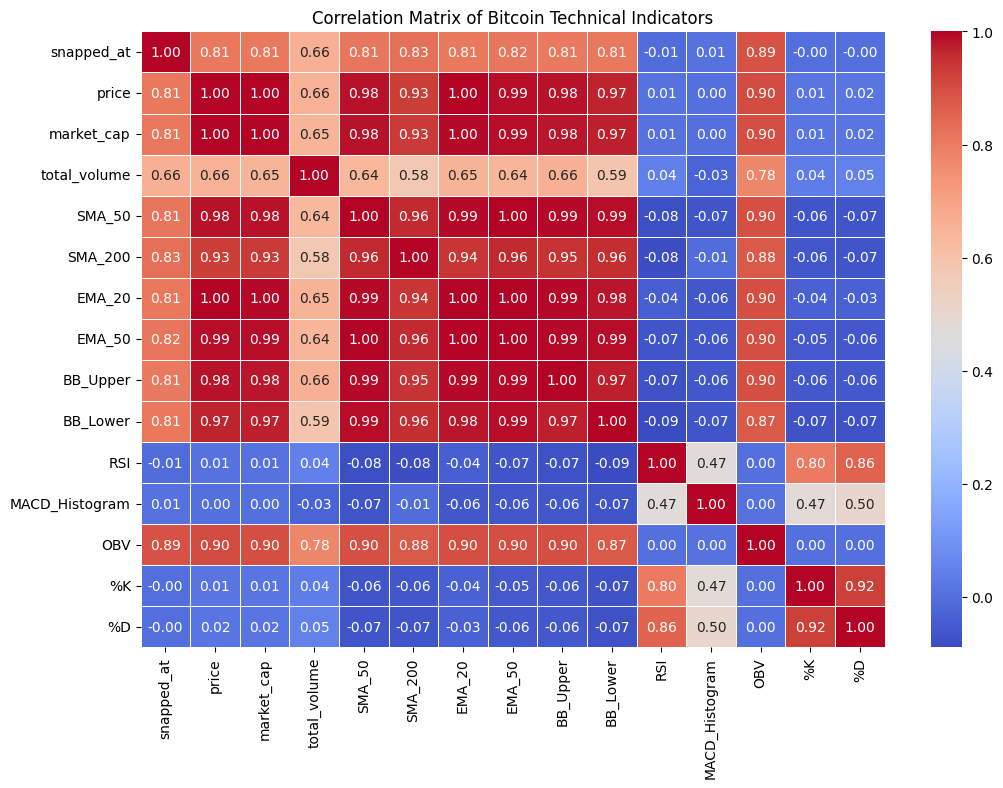

In [46]:
corr_matrix = Bitcoin_TI.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Bitcoin Technical Indicators")

plt.show()

In [47]:
Ethereum_TI = Ethereum_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]

In [48]:
Ethereum_TI.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,BB_Upper,BB_Lower,RSI,MACD_Histogram,OBV,%K,%D
3474,2025-02-10 00:00:00+00:00,2632.535822,3.173697e+11,1.715554e+10,3238.671639,2956.951865,2956.676611,3159.110250,3761.692719,2715.650559,24.893848,-330.117031,1.991673e+12,1.350064,1.051880
3475,2025-02-11 00:00:00+00:00,2660.296800,3.207115e+11,1.884342e+10,3226.359786,2954.384532,2928.449962,3139.548939,3774.198104,2678.521469,27.942885,-302.063753,2.010517e+12,5.475392,2.877011
3476,2025-02-12 00:00:00+00:00,2603.033370,3.139432e+11,2.121291e+10,3210.127625,2951.008764,2897.457906,3118.509112,3782.731078,2637.524172,28.932067,-337.791980,1.989304e+12,0.000000,2.275152
3477,2025-02-13 00:00:00+00:00,2736.270314,3.294925e+11,2.650366e+10,3194.901925,2948.417057,2882.106707,3103.519356,3776.721748,2613.082103,34.488017,-348.688169,2.015807e+12,19.216204,8.230532
3478,2025-02-14 00:00:00+00:00,2675.709001,3.225841e+11,1.893819e+10,3178.525887,2945.431352,2862.449782,3086.742479,3771.903438,2585.148335,25.013383,-336.358493,1.996869e+12,10.481700,9.899301


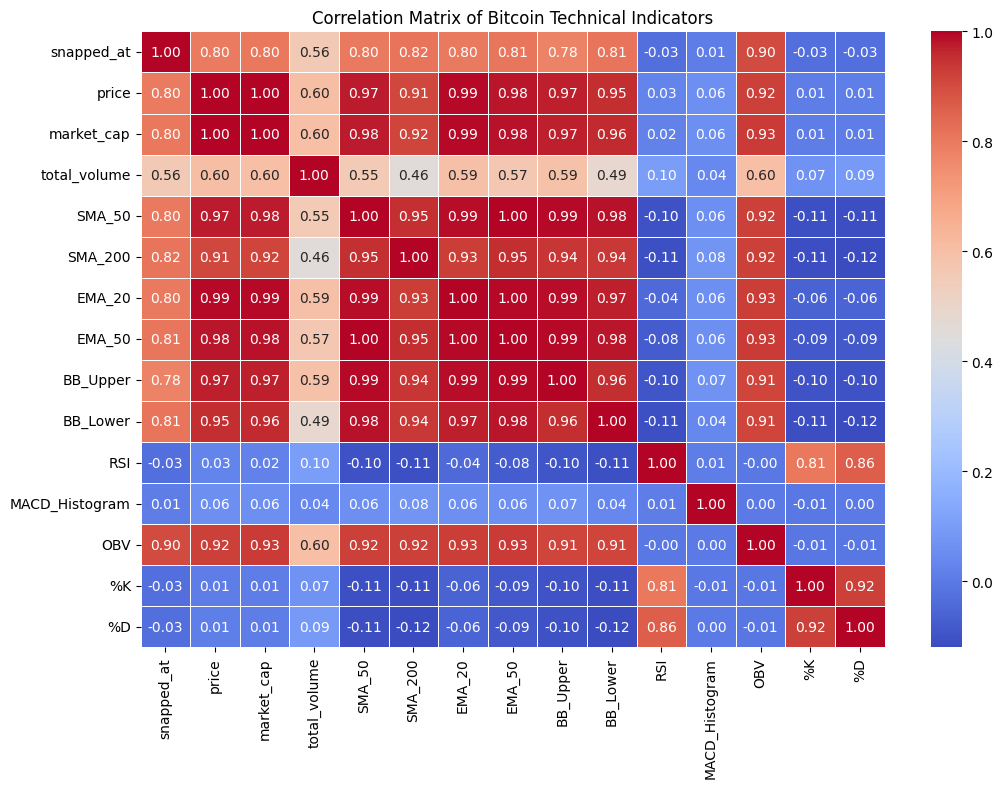

In [49]:
corr_matrix = Ethereum_TI.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Bitcoin Technical Indicators")

plt.show()

In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer

In [51]:
Bitcoin_TI.set_index('snapped_at', inplace=True)
target = 'price'
technical_indicators = ["market_cap", "total_volume", "SMA_50", "SMA_200", "EMA_20", "EMA_50",
                        "BB_Upper", "BB_Lower", "RSI"]

data = Bitcoin_TI[[target] + technical_indicators]


data = Bitcoin_TI[[target] + technical_indicators]

#using mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)


#features x and y
X = data_imputed[technical_indicators]
y = data_imputed[target]
#training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#standard scalar to standadise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
#svm(regresioon)
svm_model = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.2)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

RMSE: 12049.2632
MSE: 145184744.0468
MAPE: 16.8158%
R2 value: 0.5621


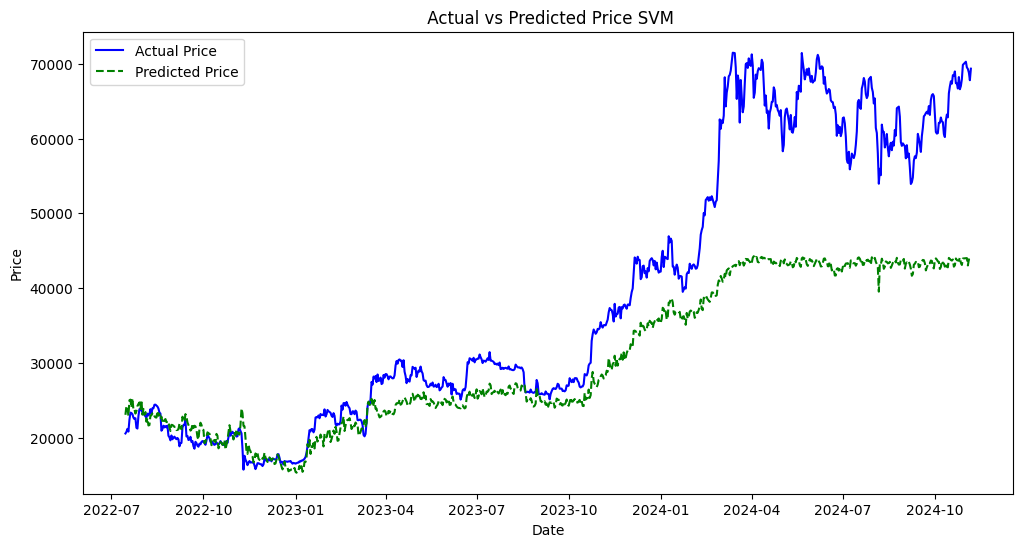

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title(' Actual vs Predicted Price SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

svr = SVR(kernel='rbf')

#randomizedsearchCV
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)

best_svr = random_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

Best Parameters: {'gamma': 0.001, 'epsilon': 0.2, 'C': 1000}
RMSE: 6380.9839
MSE: 40716955.0211
MAPE: 11.2370%
R2 value: 0.8772


RMSE: 4596.0585
MSE: 21123753.7682
MAPE: 7.1079%
R2 value: 0.9363


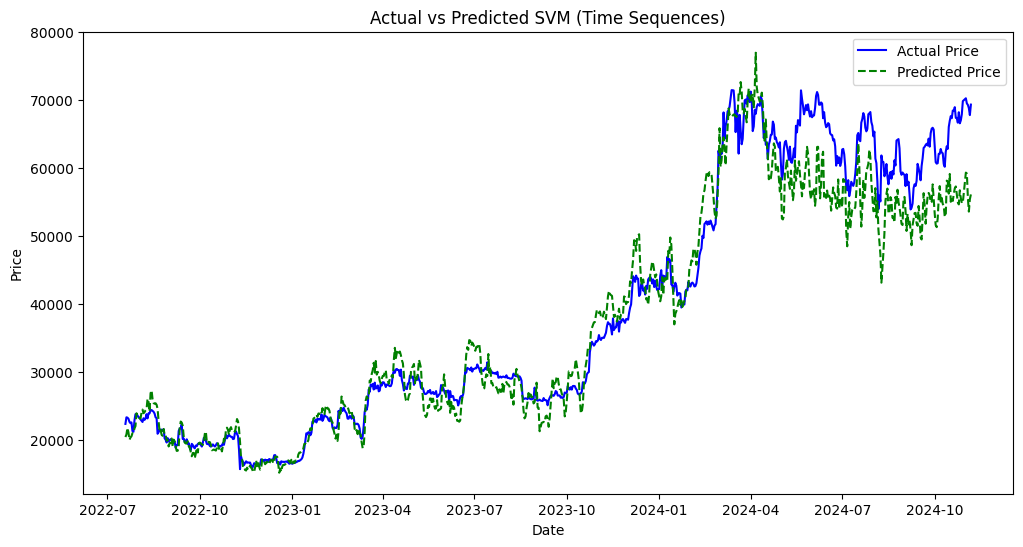

In [55]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50',
            'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', '%K', '%D']
target = 'price'

X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
imputer = SimpleImputer(strategy='mean')

X_train_raw = imputer.fit_transform(X_train_raw)
X_test_raw = imputer.transform(X_test_raw)

X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1)).flatten()

def time_sequences(X, y, seq_length=4):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = time_sequences(X_train_scaled, y_train_scaled, seq_length=4)
X_test_seq, y_test_seq = time_sequences(X_test_scaled, y_test_scaled, seq_length=4)

X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], -1)

svm_model = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.02)
svm_model.fit(X_train_seq, y_train_seq)

y_pred_scaled = svm_model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_raw.index[-len(y_test_actual):], y_test_actual, label="Actual Price", color='blue')
plt.plot(y_test_raw.index[-len(y_test_actual):], y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title('Actual vs Predicted SVM (Time Sequences)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 1686.0322
MSE: 2842704.5273
MAPE: 2.7133%
R2 value: 0.9914


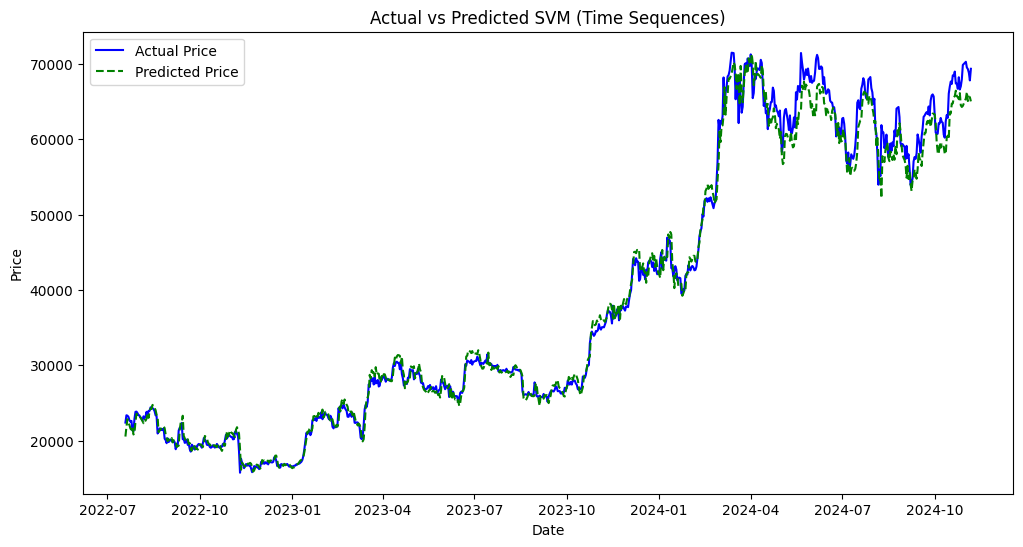

In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50',
            'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', '%K', '%D']
target = 'price'

X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
imputer = SimpleImputer(strategy='mean')

X_train_raw = imputer.fit_transform(X_train_raw)
X_test_raw = imputer.transform(X_test_raw)

X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test_raw.values.reshape(-1, 1)).flatten()

def time_sequences(X, y, seq_length=4):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = time_sequences(X_train_scaled, y_train_scaled, seq_length=4)
X_test_seq, y_test_seq = time_sequences(X_test_scaled, y_test_scaled, seq_length=4)

X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], -1)

svm_model = SVR(kernel='rbf', C=1000, gamma=0.001, epsilon=0.01) #chnaged the parameters to best paramters obtainted using randomsearchsv in above cell
svm_model.fit(X_train_seq, y_train_seq)

y_pred_scaled = svm_model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_raw.index[-len(y_test_actual):], y_test_actual, label="Actual Price", color='blue')
plt.plot(y_test_raw.index[-len(y_test_actual):], y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title('Actual vs Predicted SVM (Time Sequences)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#this gridsearchcv is taking a lot of time so using randomsearchcv instead of this
from sklearn.model_selection import GridSearchCV

#parameter tuning
parameters = {
    'C': [10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['poly', 'rbf']
}

svm_model = SVR()

grid_search = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
#select best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 3335.0396
MSE: 11122489.2244
MAPE: 6.2382%
R2 value: 0.9664


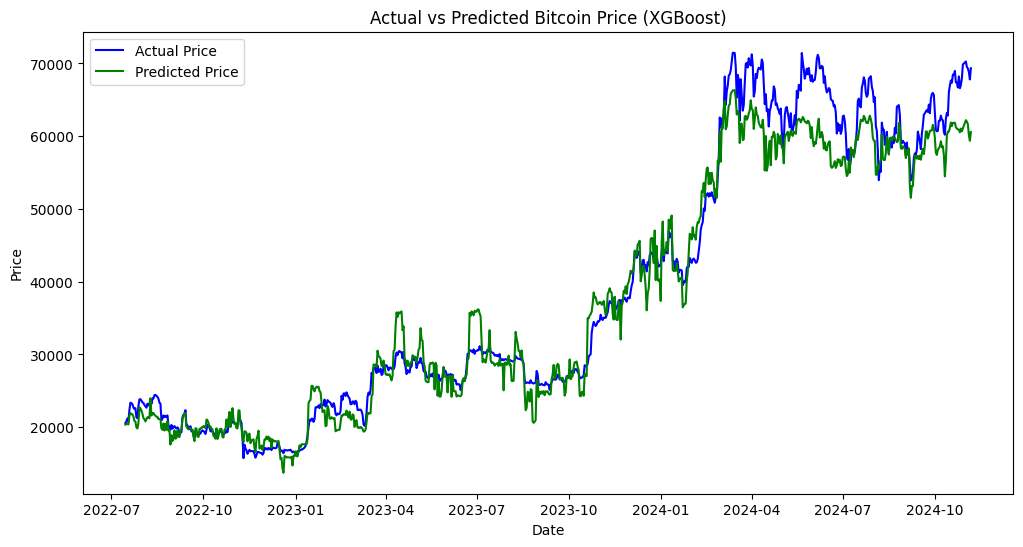

In [67]:
import xgboost as xgb

features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', '%K', '%D']
target = 'price'

X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.3, max_depth=6) #using default parameters
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", color='green')
plt.title('Actual vs Predicted Bitcoin Price (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
}

random_search = RandomizedSearchCV(xgb_model, param_dist, scoring='neg_mean_squared_error', n_iter=20, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}


RMSE: 2842.7122
MSE: 8081012.7065
MAPE: 5.8966%
R2 value: 0.9756


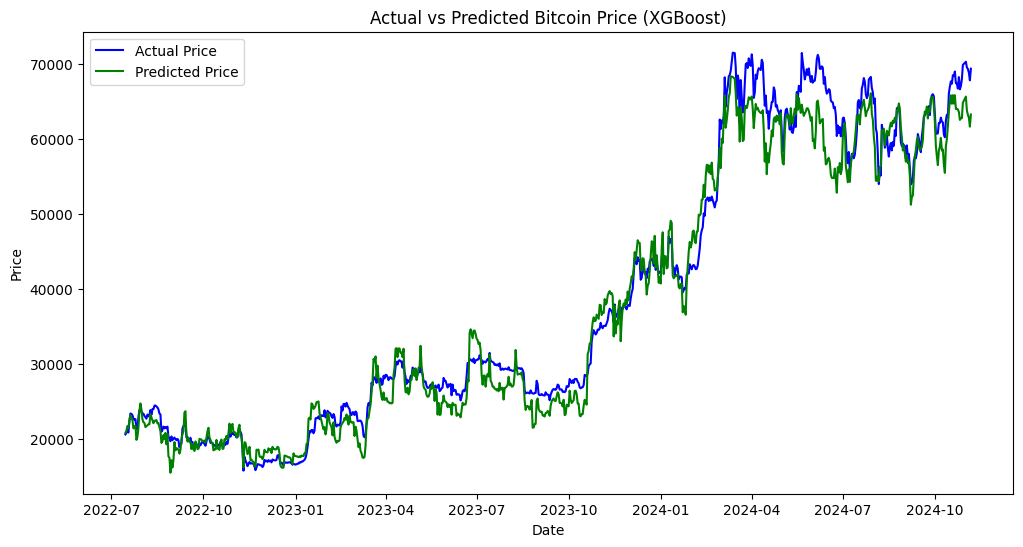

In [68]:
features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', '%K', '%D']
target = 'price'

X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.2, max_depth=3) #using best parameters i got from randomsearchcv
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", color='green')
plt.title('Actual vs Predicted Bitcoin Price (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 4865.2754
MSE: 23670904.6187
MAPE: 9.9831%
R2 value: 0.9286


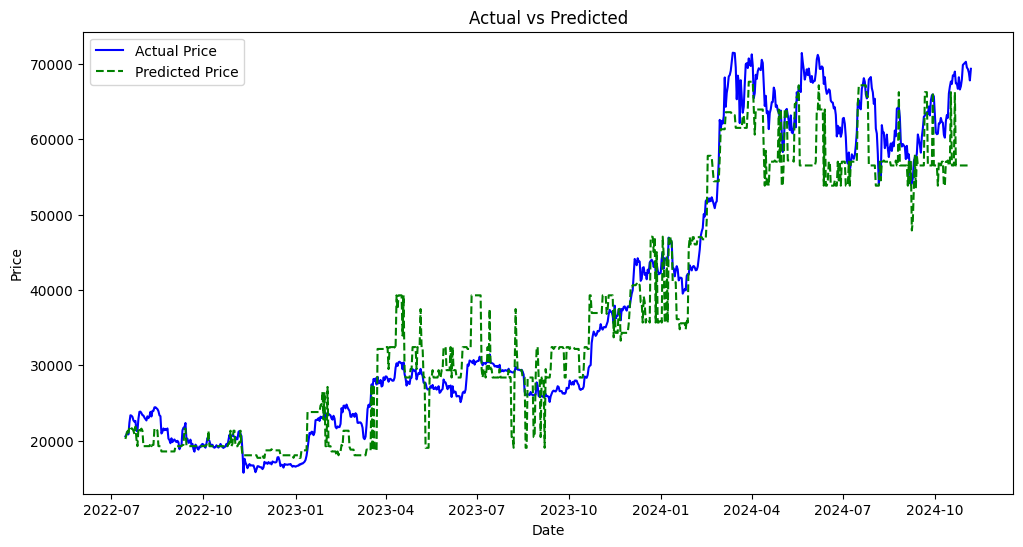

In [85]:
from sklearn.tree import DecisionTreeRegressor

features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', 'OBV', '%K', '%D']
target = 'price'

X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=10) #using all default values
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
Ethereum_TI.set_index('snapped_at', inplace=True)
target = 'price'
technical_indicators = ["market_cap", "total_volume", "SMA_50", "SMA_200", "EMA_20", "EMA_50",
                        "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram", "OBV", "%K", "%D"]

data = Ethereum_TI[[target] + technical_indicators]

data.dropna(inplace=True)

#features x and y
X = data[technical_indicators]
y = data[target]
#training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#standard scalar to standadise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RMSE: 356.6819
MSE: 127222.0065
MAPE: 9.7640%
R2 value: 0.7481


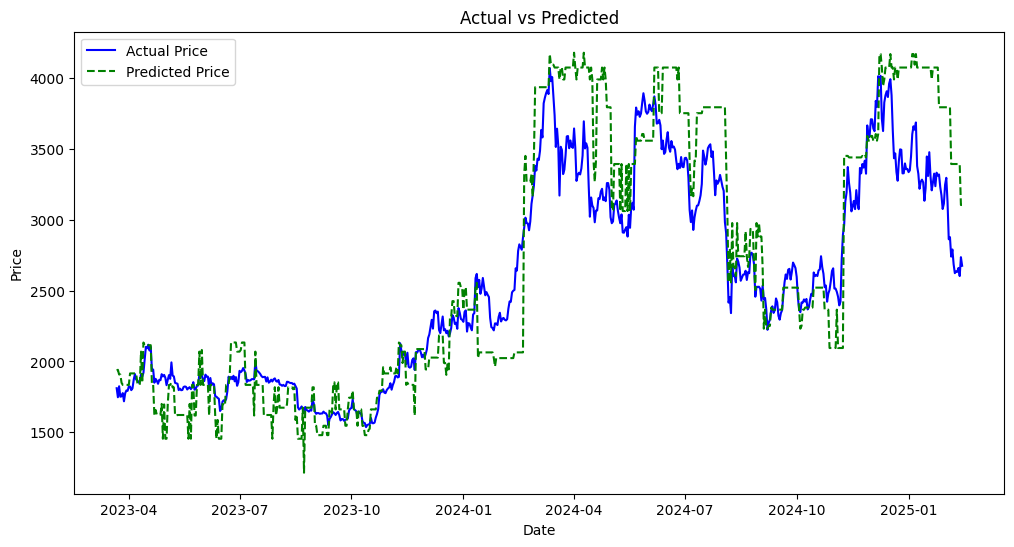

In [86]:
from sklearn.tree import DecisionTreeRegressor

features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', 'OBV', '%K', '%D']
target = 'price'

X = Ethereum_TI[features]
y = Ethereum_TI[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=10) #using all default values
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#svm(regresioon)
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

RMSE: 545.8852
MSE: 297990.6316
MAPE: 11.8036%
R2 value: 0.4099


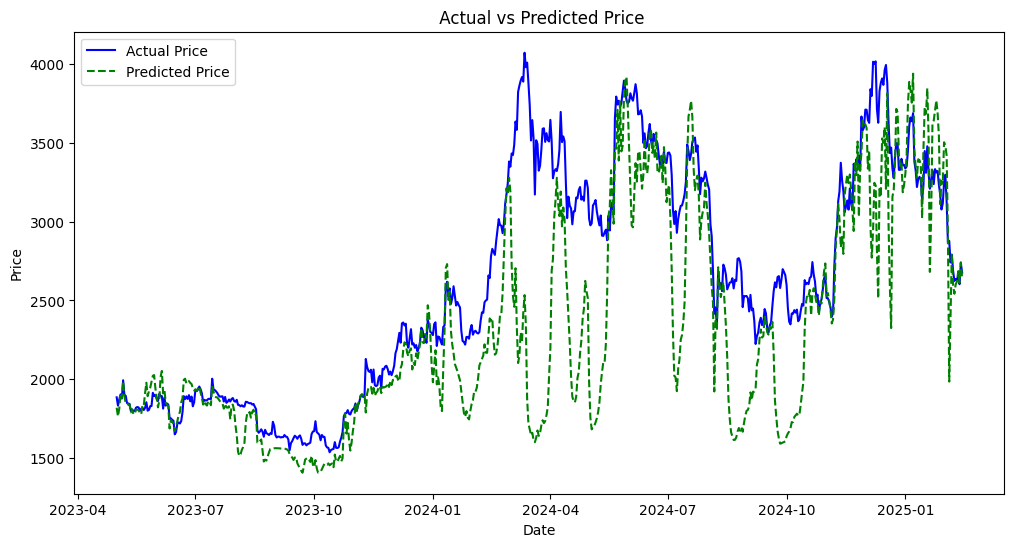

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title(' Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()